Importing required python modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from sklearn.decomposition import PCA


Importing the drive module because to access the data CSV file in google colab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Importing the data set into a data frame by reading the CSV file

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data.csv')
print(dataset.head())

               review_id                                               text  \
0  product_review_000000  Great story line and game play, somewhat simil...   
1  product_review_000001  Love these strings, beefy is the way to go if ...   
2  product_review_000002  Good game if you liked the first one you would...   
3  product_review_000003  I love this mixer  and I'm a mixer snob (i.e. ...   
4  product_review_000004  I loved Halo through Halo 3, and I thoroughly ...   

  verified  review_score     product_category  
0    False           5.0          video_games  
1     True           5.0  musical_instruments  
2     True           4.0          video_games  
3    False           5.0  musical_instruments  
4     True           5.0          video_games  


* **Exploratory Data analysis**

Plotting a bar graph to visualise the missing values for each column in the data set and we can observe that there is an imbalance in the data set

Text(0.5, 1.0, 'Imbalanced Data Composition')

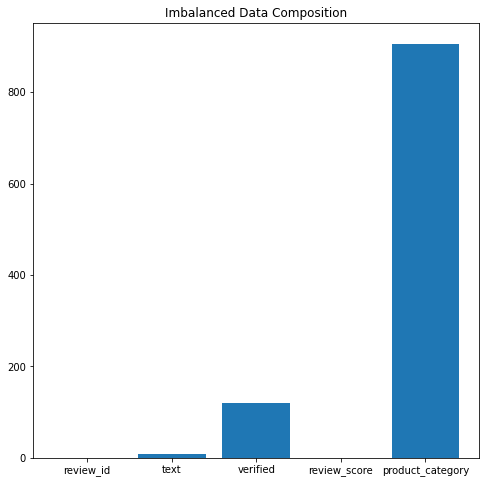

In [4]:
# Missing values or null values in each coloumn
data = [dataset['review_id'].isna().sum(),dataset['text'].isna().sum(),dataset['verified'].isna().sum(),dataset['review_score'].isna().sum(),dataset['product_category'].isna().sum()]
plt.figure(figsize = (8,8))
plt.bar(dataset.columns,data)
plt.title("Imbalanced Data Composition")

* Applying Describe function to the dataset to Summarise the statistics for numerical features

In [5]:
dataset.describe()

,review_score
count,32918.000000
mean,4.088280
std,1.435359
min,-1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


* From the describe function result we can observe that there is -1 for the review_score attribute which is invalid because a rating for a product is on a scale of 1 to 5. So by replacing the -1 with np.nan which means not a number in Numpy

* Replacing Invalid data with np.nan
* For CATEGORICAL features, we want to use the Pandas function `value_counts()` to obtain information about how many categories there are and how many instances of each.

In [6]:
#Replacing '-1' with np.nan 
print(dataset['review_score'].value_counts())
dataset.loc[dataset.review_score<0,'review_score'] = np.nan
print("After filling the -1 review_score with np.nan we get result as")
print(dataset['review_score'].value_counts())

 5.0    19266
 4.0     6202
 3.0     3133
 1.0     1872
 2.0     1538
-1.0      907
Name: review_score, dtype: int64
After filling the -1 review_score with np.nan we get result as
5.0    19266
4.0     6202
3.0     3133
1.0     1872
2.0     1538
Name: review_score, dtype: int64


* Finding out how many missing values (or NaN values) are there in each feature, using Pandas `isna()` function. Here we can find that there are almost equal missing or null values for the review_score and product_category column

In [7]:
dataset.isna().sum()

review_id             0
text                  9
verified            119
review_score        907
product_category    906
dtype: int64

* A Bar chart is plotted after replacing the invalid values present in the review score column

Text(0.5, 1.0, 'Imbalanced Data Composition')

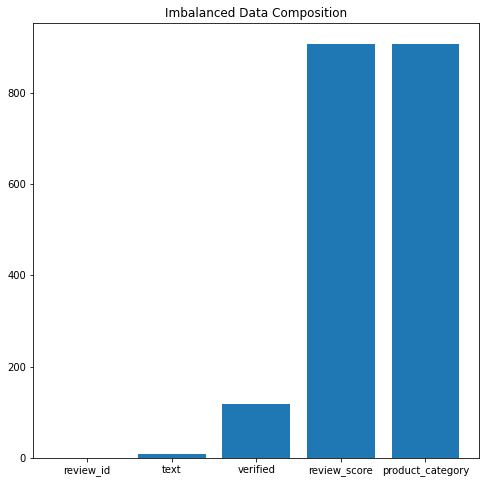

In [8]:
# Missing values or null values in each coloumn
data = [dataset['review_id'].isna().sum(),dataset['text'].isna().sum(),dataset['verified'].isna().sum(),dataset['review_score'].isna().sum(),dataset['product_category'].isna().sum()]
plt.figure(figsize = (8,8))
plt.bar(dataset.columns,data)
plt.title("Imbalanced Data Composition")

* **Data cleaning**

* Here we are removing the invalid data for the review_score column by Storing the review id for a row in the dataset data frame by determining the invalid values from all the columns and removing them from the data frame

In [9]:
import math
invalid = []
for i in dataset.index:
  if (math.isnan(dataset.review_score[i])):
    value1 = dataset.review_id[i]
    invalid.append(value1)
# Excluding the rows which has invalid values in the dataset
for i in invalid:
  dataset.drop(dataset.index[dataset['review_id'] == i], inplace=True)
print(dataset)

                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My son will love this..      Tr

* Removing the missing values and storing them in missing[] array based on review_id

In [10]:
missing = []
for i in dataset.index:
  if (pd.isna(dataset.text[i])):
    value2 = dataset.review_id[i]
    missing.append(value2)
  elif (pd.isna(dataset.product_category[i])):
    value3 = dataset.review_id[i]
    missing.append(value3)
  elif (pd.isna(dataset.verified[i])):
    value4 = dataset.review_id[i]
    missing.append(value4)
# Excluding the rows which has null or missing values in the dataset
for i in missing:
  dataset.drop(dataset.index[dataset['review_id'] == i], inplace=True)
print(dataset)

                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My son will love this..      Tr

* Finding the duplicate rows and storing there review Id and then removing them from the dataframe by taking the review id as reference

In [11]:
duplicate = dataset[dataset.duplicated('text')]
duplicateId = []
for i in duplicate.review_id:
  value = i
  duplicateId.append(value)
# Removing the duplicate rows from the dataset 
for i in duplicateId:
  dataset.drop(dataset.index[dataset['review_id'] == i], inplace=True)
print("After removing duplicates: ")
print(dataset)

After removing duplicates: 
                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My 

* Sum of Excluded rows from data set

In [12]:
print(len(missing) + len(invalid) + len(duplicateId))

2869


* Categorical columns count

In [13]:
categorical_columns= ['verified', 'product_category']
for col in categorical_columns:
  print(f"Categories and number of occurrences for '{col}'")
  print(dataset[col].value_counts())
  print()

Categories and number of occurrences for 'verified'
True     21425
False     8624
Name: verified, dtype: int64

Categories and number of occurrences for 'product_category'
video_games            20390
musical_instruments     9659
Name: product_category, dtype: int64



* Encoding the product_category Categorical data into numerical using label encoder.
Data Preprocessing in machine learning requires values of the data in numerical form. Therefore text values in the columns of datasets must be converted into numerical form.

In [14]:
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
dataset['product_category'] = lblEncoder_X.fit_transform(dataset['product_category']) 
print(dataset)

                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My son will love this..      Tr

* **Text Preprocessing**


* NLTK(natural language tool kit) is used for working on natural language processing in python
* re is a RegEx library used for string pattern
* Here first the stop words are removed based on stopwords for English and then punctuations are removed based on a pattern
* Stemming or lemmatization is applied to the words to transform them to its root form
* Then the corpus is stored with the resultant documents

In [15]:
#Cleaning the text
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 30049):
  review = re.sub('[^a-zA-Z]', ' ', dataset.iloc[i]['text'])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
for i in range(10):
  print(corpus[i])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
great stori line game play somewhat similar older game regard game play mechan enough improv make worth way play stori mode adventur mode free battl onlin fight play stori hour long experi end realli well done dont worri ruin surpris stori mode come across numer peopl creatur fight v either game also util xbox one capabl anim graphic difficulti wise challeng enough good time noth like say dark soul love hardcor game replay abil wise inst ton combo sequenc lot master movement system block system chakra charg well ton charact alway look forward bit differ game play time around fun game definit differ enough game xbox right desearv spot shelf bandai outdid bandai outdid
love string beefi way go love long sustain activ pick up would use anyth els tast use brand matter style gone slinki alway felt best hand love string
good game like first one would like one mani updat sinc first c

* Creating Bag of words model with count vectorizer
* Here the unigrams are considered based on min_df = 10 which means the terms occur less than 10 documents and max_df = 0.5 which means the common terms which are present in 50% of the documents

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), lowercase=False, tokenizer=None,
                       min_df=10, max_df=0.5)
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[:, -1].values

* Splitting the data set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

* Logistic Regression
* Training the model with training data 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
lgr = LogisticRegression().fit(X_train_tfidf, y_train)


* Predicting with test set

In [19]:
y_pred = lgr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


* Confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2566  291]
 [ 338 5820]]


0.9302273987798114

F1 score

In [21]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='macro')

0.9197750722184717

* MultiNomial Naive Bayes

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

* Predicting with test set

In [23]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 1]
 ...
 [0 0]
 [1 1]
 [0 0]]


* Confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[2615  242]
 [ 399 5759]]


0.9288962839711592

F1 score

In [25]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='macro')

0.9190505650244968

* Working with review score
* Here the review score is converted to categorical and stored in review group column because there are multi class to predict

In [26]:
category = pd.cut(dataset.review_score,bins=[1,2,4,5],labels=['Negative','Average','Positive'])
dataset.insert(3,"review_group", category)
print(dataset)

                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My son will love this..      Tr

* label encoding for review group

In [27]:
from sklearn.preprocessing import LabelEncoder
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()   
dataset['review_group'] = lblEncoder_X.fit_transform(dataset['review_group']) 
print(dataset)

                   review_id  \
0      product_review_000000   
1      product_review_000001   
2      product_review_000002   
3      product_review_000003   
4      product_review_000004   
...                      ...   
32913  product_review_032913   
32914  product_review_032914   
32915  product_review_032915   
32916  product_review_032916   
32917  product_review_032917   

                                                    text verified  \
0      Great story line and game play, somewhat simil...    False   
1      Love these strings, beefy is the way to go if ...     True   
2      Good game if you liked the first one you would...     True   
3      I love this mixer  and I'm a mixer snob (i.e. ...    False   
4      I loved Halo through Halo 3, and I thoroughly ...     True   
...                                                  ...      ...   
32913  GUNS! GUNS! GLORIOUS GUNS!!! ...for about 30 m...     True   
32914                           My son will love this..      Tr

* Bag of word models

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,1), lowercase=False, tokenizer=None,
                       min_df=10, max_df=0.5)
X1 = cv.fit_transform(corpus).toarray() 
Y1 = dataset.iloc[:, -3].values
print(X[0])

[0 0 0 ... 0 0 0]


* Splitting the dataset

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size = 0.30, random_state = 0)
print(X_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0 2 ... 2 2 2]


* Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
lgr = LogisticRegression().fit(X_train_tfidf, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


* Predicting with test data

In [31]:
y_pred = lgr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 0]
 [1 0]
 [2 2]
 ...
 [2 2]
 [0 2]
 [2 2]]


* Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1548  292  767   60]
 [ 196  147   57   34]
 [1166  198 3931   70]
 [  95  170   63  221]]


0.648585690515807

F1 Score

In [33]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='macro')

0.5070123587372408

* Multinomial naive bayes

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

* Predicting with test data

In [35]:
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 0]
 [0 0]
 [2 2]
 ...
 [2 2]
 [0 2]
 [2 2]]


* Confusion matrix

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1214    1 1450    2]
 [ 264    0  167    3]
 [ 647    1 4710    7]
 [ 259    0  240   50]]


0.66267332224071

F1 score

In [37]:
from sklearn import metrics
metrics.f1_score(y_test, y_pred, average='macro')

0.35845917425701723